# 2 - Utility, investor types and optimal portfolio with one asset

Espen Sirnes  
2025-08-10

# Expected Utility

In finance, the utility function is typically defined as the utility
derived from a certain amount $x$. It is generally assumed that greater
wealth yields higher utility; hence, the utility function should be
increasing, meaning $U'(x) > 0$. In situations involving risk, such as
holding shares with uncertain future values, it becomes useful to
calculate the *expected utility* of a set of possible outcomes $x_i$
with probabilities $P(x_i)$ and utilities $u(x_i)$ (Neumann and
Morgenstern 1947).

This builds on the general notion of expectations in statistics. For a
set of outcomes $x_i$ and probabilities $P(x_i)$, for example, the
expected value is $X=\{ x_0, x_1,\dots,x_n \}$ and is given by

<span id="eq-descrete_exp">$$
\mathbb{E}[X] = \sum_{i=0}^{N} P(x_i) x_i
 \qquad(1)$$</span>

For example:

In [1]:
import numpy as np

p = np.array([0.5, 0.2, 0.3])
x = np.array([3,10, 20])

np.sum(p*x)

np.float64(9.5)

In the same way, the discrete expected utility for a set of outcomes
$x_i$ with probabilities $P(x_i)$ is defined as follows:

<span id="eq-descrete_exp">$$
U(X) = \mathbb{E}[u(X)] = \sum_{i=0}^{N} P(x_i) u(x_i)
 \qquad(2)$$</span>

where $P(x_i)$ is the probability that $X$ assumes the value $x_i$, and
$u(x_i)$ represents the utility derived if that event occurs.

For example, say utilities 2, -4, and 6 occur with probabilities 0.5,
0.2, and 0.3; then the expected utility is

In [2]:
import numpy as np

p = np.array([0.5, 0.2, 0.3])
u = np.array([2, -4, 6])

U = np.sum(p*u)
U

np.float64(1.9999999999999998)

For a continuous distribution, the idea is the same. We multiply each
utility state $u(x_i)$ with the probability it occurs $f(x)dx$. The
integral sign $\int_{-\infty}^{\infty} \dots ,$ (Leibniz 1969) is the
equivalent of a sum for continuous variables. The expected utility is
therefore given by:

<span id="eq-cont_exp">$$
U(X) = \mathbb{E}[u(X)] = \int_{-\infty}^{\infty} u(x) f(x)\ dx,
 \qquad(3)$$</span>

where $f(x)$ is the density function of $X$, such as the normal
distribution.

## Discrete normal distribution

To make this a bit more tangible, let us assume $f(x)$ represents the
standard normal distribution (variance = 1 and mean = 0), and assume we
categorize the outcomes $x$ into five intervals. In Python, we can
obtain discrete equivalents of the normal probabilities (Gauss 1809) of
a set of intervals in the range `-minmax` to `minmax`, each with a width
of `dx`, as follows:

In [3]:
from scipy.stats import norm

dx = 2
minmax = 4

# Define the x range from -minmax to minmax
x = np.arange(-minmax, minmax + dx, dx)

# Calculate the corresponding standard normal distribution,
# where mean = 0 and standard deviation = 1
p = norm.pdf(x, 0, 1)

print(f"Outcomes: {x}")
p_perc = [f"{i}%" for i in np.round(p*100,0)]
print(f"Probabilities: {p_perc}")
print(f"Sum of probabilities: {np.sum(dx*p)}")

Outcomes: [-4 -2  0  2  4]
Probabilities: ['0.0%', '5.0%', '40.0%', '5.0%', '0.0%']
Sum of probabilities: 1.014383747758677

Probabilities sum by definition to one, but we see that these do not sum
to exactly 1.0. This discrepancy arises due to the coarse nature of the
discrete categories.

We can use the function `plot_descrete_and_normal` in the local module
`utility.py` in this repository to visualize the probabilities and the
normal distribution:

*<a href="#fig-discrete-normal" class="quarto-xref">Figure 1</a>*:

In [4]:
# Using utility.plot_descrete_and_normal() to plot the discrete 
# distribution and the corresponding normal distribution.
from matplotlib import pyplot  as plt
import utility
fig, ax = utility.plot_descrete_and_normal(p, x, dx, minmax, plt)

-   **Challenge 1**: Reduce the interval size $dx$ and sum the
    probabilities to observe if the total approaches 1.

As demonstrated above, decreasing the interval size $dx$ brings the
discrete distribution closer to the continuous one. The continuous
distribution serves as an approximation when outcomes are real numbers,
which is often the case in investment scenarios.

The primary advantage of continuous variables over discrete ones is that
we can apply powerful mathematical tools, such as derivatives and
integrals, from calculus.

## Calculating the mean and variance with a discrete distribution

With the discrete distribution given by the probabilities `p` and values
`x` calculated in
<a href="#fig-discrete-normal" class="quarto-xref">Figure 1</a>, we can,
for example, calculate the expected value and variance with these
probabilities. Since the standard normal distribution was assumed, we
would expect the mean to be close to 0 and the variance to be close to
1.

In [5]:
dx = 0.1
minmax = 8


true_mean = 0
true_variance = 1


x = np.arange(-minmax + true_mean, minmax + true_mean + dx, dx)
p = norm.pdf(x, true_mean, true_variance**0.5)

mean = np.sum(p*x*dx)

variance = np.sum(
        p*((x-mean)**2)*dx
        )
        
print(f"Numerically calculated mean is: {mean}")
print(f"Numerically variance is: {variance}")

Numerically calculated mean is: 5.551115123125783e-17
Numerically variance is: 0.9999999999999498

We see that the mean is quite close to zero, but the variance is not
that close to one. The likely reason for the latter is the coarse
grouping.

-   **Challenge 2**: See if a finer categorization gives a more exact
    variance estimate.

## Calculating expected utility

Let us now return to the main topic: expected utility theory. A key
outcome of this model is that with a concave utility function, an
individual will always prefer a guaranteed cash flow over a speculative
investment with the same expected return. Consider an individual with an
exponential (Euler 1748) utility function:

<span id="eq-CARA_utility">$$
u(x) = -\mathrm{e}^{-\rho\cdot x}
 \qquad(4)$$</span>

which is increasing and concave, as shown by its first and second
derivatives:

<span id="eq-CARA_utility_derivative">$$
u'(x) = -\rho \cdot u(x)>0
 \qquad(5)$$</span> <span id="eq-CARA_utility_2derivative">$$
u''(x) = \rho^2 \cdot u(x)< 0
 \qquad(6)$$</span>

Suppose there is a 50% chance of $x=0.5$ and a 50% chance of $x=1.5$.
That is, the possible outcomes are given by $X = {0.5, 1.5}$, with
associated probabilities $P(X) = {0.5, 0.5}$. The expected value is then
$\frac{1}{2}(-\mathrm{e}^{-\rho\cdot 0.5}-\mathrm{e}^{-\rho\cdot 1.5})$.

Below is the utility function defined as the function `u_func(x, rho)`.
It is convenient to also define the inverse of the utility function
`x_func(u, rho)`. Assuming $\rho = 15.0$, we can calculate expected
utilities and outcomes as follows:

In [6]:
import numpy as np

# Values and probabilities
x_gamble = np.array([0.5, 1.5])  # Outcomes of the 
                                 # gamble
p_gamble = np.array([0.5, 0.5])  # Probabilities
RHO = 5.0

#utility function
def u_func(x, rho):
    return -np.exp(-rho*np.array(x))

# We will also need the inverse of the utility function:
def x_func(u, rho): 
    return -np.log(-u)/rho

# Expected utility
expected_utility = np.sum(p_gamble * 
                                u_func(x_gamble, RHO))
expected_outcome = np.sum(p_gamble * 
                                x_gamble)
utility_exp_outcome = u_func(expected_outcome, RHO)

print(f"Expected utility: {expected_utility}")
print(f"Expected outcome: {expected_outcome}")
print(f"Utility of expected value: {utility_exp_outcome}")

Expected utility: -0.04131904149702332
Expected outcome: 1.0
Utility of expected value: -0.006737946999085467

-   **Challenge 3**: Now, assume the utility function is
    $f(x) = -\mathrm{log}(\rho x)$ (the natural logarithm). What is the
    expected utility?

By comparing the utility of the expected value of 1.0 with the expected
utility, you can verify that the utility of the expected value is
greater than the expected utility:

<span id="eq-CARA_utility_expected_diff">$$
u(\mathbb{E}X) = \mathrm{e}^{\rho\cdot 1} > \frac{1}{2}\mathrm{e}^{\rho\cdot 0.5}+\frac{1}{2}\mathrm{e}^{\rho\cdot 1.5} = \mathbb{E}u(X),
 \qquad(7)$$</span>

This example demonstrates that the utility of a certain outcome
$(-\mathrm{e}^{\rho})$ is preferred over the expected utility of a
gamble. This preference underscores risk aversion. The situation is
illustrated in the following plot:

*<a href="#fig-graphical-risk-prem" class="quarto-xref">Figure 2</a>:*

In [7]:
import utility
fig,ax = utility.plot(RHO, x_gamble, p_gamble, u_func, x_func, plt)

The code is a bit too long to be included here but can be found in the
local module `utility.py` in this repository.

As we can see, the utility at expected wealth 1 is about -0.37, while
the mean utility is lower at -0.41. You can verify that the line drawn
between the utility of 0.5 and 1.5 intersects the mean utility of -0.41.

Hence, with a concave utility function, a person will always prefer a
sure amount rather than a bet with the same expected payoff. In this
case, the risk-averse investor will invariably prefer the certain
payment of 1 over the gamble.

The difference indicated by $\rho$ in the figure is the certainty
equivalence. It is the amount that you would need to compensate the
investor in order to take the gamble. In a real market, this is the
premium that investors demand to hold risky assets compared to safe
bills. It is usually about 2-4% on average for the whole market.

## A continuous example

Let us now calculate the expected utility with more than two outcomes.
We remember from the calculation of
<a href="#fig-discrete-normal" class="quarto-xref">Figure 1</a> and the
calculation of discrete expectations in
<a href="#eq-descrete_exp" class="quarto-xref">Equation 2</a> that a
discrete version of the continuous normal distribution can be calculated
by taking the sum of probabilities and outcomes. When the outcomes are
utilities, we sum over probabilities and utilities for each $x$. If the
utility is $u(x) = - \mathrm{e}(-\rho x)$ and $x$ and $p$ are calculated
as above, a discrete approximation to the continuous expected utility,
given $x$ is normally distributed, is

In [8]:
print(f'Approximate expected utility:{np.sum(p*dx*u_func(x, RHO))}')

Approximate expected utility:-268031.5499517654

The above is a discrete approximation. How do we calculate the exact
expected utility? We can find this by integration; see
<a href="#eq-cont_exp" class="quarto-xref">Equation 3</a>. The normal
density function is given by

<span id="eq-normal_density">$$
\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x-\mu)^2}{2 \sigma}}
 \qquad(8)$$</span>

We can calculate the expected utility by taking the integral over the
product of the density and the utility function. It turns out that if we
do that, we obtain the analytical expected utility function:

<span id="eq-exp_utility">$$
\mathbb{E}[u(X)] = \int_{-\infty}^{\infty} u(x) f(x)\ dx = -e^{-\rho(\mu-\frac{1}{2}\rho \sigma^2)}
 \qquad(9)$$</span>

Let us now try to compare this with our approximated expected utility
above. If we have a standard normal distribution, so $\sigma=1$ and
$\mu=0$. The risk aversion coefficient is $\rho=1$. The exact and
approximate expected utility are

In [9]:
RHO = 1
dx = 2
minmax = 4

x = np.arange(-minmax, minmax + dx, dx)
p = norm.pdf(x, 0, 1)

print(f'Exact expected utility:{-np.exp(-RHO*(0-0.5*RHO*1.0))}')
print(f'Approximate expected utility:{np.sum(p*dx*u_func(x, RHO))}')

Exact expected utility:-1.6487212707001282
Approximate expected utility:-1.625001554959029

As we can clearly see from above, the approximation is not good. The
problem is that the discrete normal probability function that we have
used is too coarse. We therefore need to try smaller intervals for the
bars. Also, we want to calculate a wider range than +/-4. Let us try
with a bar width of 0.25 and a range of +/- 8:
*<a href="#fig-descrete-normal_fine" class="quarto-xref">Figure 3</a>:*

In [10]:
RHO = 1
dx = 0.01
minmax = 8

x = np.arange(-minmax, minmax + dx, dx)
p = norm.pdf(x, 0, 1)

fig, ax = utility.plot_descrete_and_normal(p, x, dx, minmax, plt)
expected_utility = np.sum(p*dx*u_func(x, RHO))


print(f'Exact expected utility:{-np.exp(-RHO*(0-0.5*RHO*1.0))}')
print(f'Approximate expected utility:{np.sum(p*dx*u_func(x, RHO))}')

Exact expected utility:-1.6487212707001282
Approximate expected utility:-1.648721270698128

We see now in
<a href="#fig-descrete-normal_fine" class="quarto-xref">Figure 3</a>
that the discrete distribution is quite similar to the continuous one,
and the approximation is also very close to the analytically exact
expected utility.

## The objective function

The most important lesson here is what is inside the brackets in
equation (<a href="#eq-exp_utility" class="quarto-xref">Equation 9</a>).
That expression effectively determines the utility, so let us rewrite it
here:

<span id="eq-mean-variance">$$
\mu-\frac{1}{2}\rho \sigma^2
 \qquad(10)$$</span>

This is therefore usually assumed to be the *objective function* of any
investor.

Hence, if returns are normally distributed, then investors would want to
maximize the difference between the mean and the variance. This is true
for any utility function if returns are normally distributed, but it is
not in general true if returns are distributed differently.

-   **Challenge 4**: Calculate the approximate expected utility with
    some other parameters and a non-standard normal distribution
    ($\sigma\neq1$ and $\mu\neq1$), and see if the approximate is still
    a good approximation.

# Optimal Portfolio with One Asset

With the knowledge from
<a href="#eq-mean-variance" class="quarto-xref">Equation 10</a>, we can
actually calculate the optimal level of investment for one risky asset
and a risk-free allocation (Tobin 1958). We will later see that the
method for doing that is very similar to how we calculate optimal
portfolios with many different assets. For now, we will assume we only
consider one asset, for example the market index. Say you buy shares for
$w$ NOK. Then, we can use the method in the previous section to find
that the expected utility depends on

<span id="eq-mean-variance2">$$
w\mu-\frac{w^2}{2}\rho \sigma^2
 \qquad(11)$$</span>

-   **Challenge 5**: Show that when multiplying a random variable by a
    constant, the variance is the variance of the random variable times
    the square of the constant.

Taking the derivative of
<a href="#eq-mean-variance2" class="quarto-xref">Equation 11</a>, which
we assume is a concave and increasing function, we get

<span id="eq-mean-variance-diff">$$
\frac{d(w\mu-\frac{w^2}{2}\rho \sigma^2)}{dw} = \mu-w\rho \sigma^2
 \qquad(12)$$</span>

Setting
<a href="#eq-mean-variance-diff" class="quarto-xref">Equation 12</a>
equal to zero and solving for $w$ gives

<span id="eq-mean-variance-diff0">$$
w=\frac{\mu}{\rho \sigma^2}
 \qquad(13)$$</span>

From this, we conclude:

1.  Higher risk aversion leads to less investment.
2.  Greater expected returns encourage more investment.
3.  Increased risk ($\sigma^2$) discourages investment.

In the next lecture, we will extend these principles to portfolios with
multiple assets using matrix algebra.

## Investor Types

The shape of a utility function critically influences how individuals
respond to risk. This subsection discusses three primary types of
investors based on their risk preferences and the corresponding shapes
of their utility functions.

-   **Risk-Averse Investors:** These individuals have concave utility
    functions, as in the example above, indicating a preference for
    certain outcomes over uncertain ones with the same expected value.
    Commonly modelled in financial theory, risk-averse investors
    prioritise minimising risk over maximising returns. They tend to
    diversify their portfolios across various asset classes to reduce
    volatility. Even with the option of unlimited borrowing, they
    typically opt to limit their investment exposure. $\rho>0$.

-   **Risk-Neutral Investors:** For risk-neutral individuals, volatility
    is inconsequential. Their utility functions are linear, reflecting
    indifference to the level of risk associated with any investment.
    They focus solely on maximising expected returns and are likely to
    invest in the asset with the highest expected payoff, irrespective
    of the associated risks. This type of investor is willing to
    allocate as much capital as possible to maximise potential gains.
    $\rho<0$

-   **Risk-Loving (Risk-Seeking) Investors:** Risk lovers have convex
    utility functions and engage in behaviours akin to gambling, where
    the expected return is typically negative. They derive satisfaction
    from the risk itself and often pursue investments that offer the
    highest possible returns, irrespective of the high levels of risk
    involved. Such behaviour is commonly seen in speculative ventures
    and high-stakes gambling. $\rho=0$

Interestingly, it is not uncommon for individuals to display traits of
both risk-averse and risk-seeking behaviours, a phenomenon that may seem
paradoxical. For instance, the same person might purchase insurance (a
risk-averse action) while also indulging in lottery gambling (a
risk-seeking behaviour). This can be explained by the utility function’s
varying shape at different levels of wealth or stakes: a person might be
risk-seeking with small, disposable amounts of money but risk-averse
with larger, life-impacting sums. This dual nature influences how
individuals choose to allocate their investments across different risk
levels.

## Assumptions in a Financial Market

In financial theory, the assumption typically made about market
participants is that they are predominantly risk-averse. This assumption
is crucial, as portfolio optimisation and related strategies largely
rely on this characteristic. Risk-neutral or risk-loving investors, who
either disregard risk or actively seek it, are considered exceptions
rather than the norm in these models. This foundational assumption
allows for the development of investment strategies that aim to maximise
returns while minimising risk, aligning with the preferences of
risk-averse individuals.

# The Risk Premium

We understand that a risk-averse individual has a concave utility
function, indicated by $u^{\prime \prime}(x) < 0$. But how do we
quantify the degree of risk aversion?

A direct approach might be to use the second derivative of the utility
function, $u^{\prime \prime}(x)$, as a measure of risk aversion.
However, this method has limitations, particularly at higher wealth
levels. The issue arises because the curvature of the utility function
tends to flatten as wealth increases, implying a decrease in relative
risk aversion. If we solely relied on $u^{\prime \prime}(x)$ for
measuring risk aversion, it might inaccurately suggest that wealthier
individuals become nearly risk-neutral, due to the diminishing curvature
in their utility functions. In other words, we might prefere a measure
of risk aversion that

This phenomenon can be explained by the principle of decreasing marginal
utility, which asserts that the incremental value or utility derived
from each additional unit of wealth diminishes at higher wealth levels.

## Absolute Risk Aversion (ARA)

A more nuanced measure of risk aversion is defined through the Absolute
Risk Aversion (ARA) (Pratt 1964; Arrow 1971) index, given by:

<span id="eq-ARA_def">$$
\rho_{ARA}(x) = -\frac{u''(x)}{u'(x)}
 \qquad(14)$$</span>

This metric, also known as the Arrow–Pratt measure of risk aversion,
remains robust against the non-linear scaling of wealth. As wealth
increases, both the second derivative $u''(x)$ and the first derivative
$u'(x)$ typically decrease, but their ratio, representing the ARA,
adjusts proportionally. Thus, the measure of risk aversion does not
necessarily approach zero as wealth grows, providing a more reliable
indicator across different wealth levels.

This measure is intrinsically linked to the concept of the risk premium.

### Constant Absolute Risk Aversion (CARA)

If ARA is constant, we refer to it as Constant Absolute Risk Aversion
(CARA). The utility function aligning with CARA can be derived by
solving the differential equation $\rho_{CARA} = -u''/u'$, which gives:

<span id="eq-CARA_def">$$
u(x) = -e^{-x \cdot \rho_{CARA}}
 \qquad(15)$$</span>

This is the exact same utility function as in the previous examples.
Although the CARA utility function is negative, it should not be
interpreted as the individual deriving negative utility from wealth.
Instead, it serves as a ranking mechanism among different wealth levels,
ensuring $u(x) > u(y)$ whenever $x > y$, and $u(x) > u(y)$ whenever
$\mathrm{var}(x) > \mathrm{var}(y)$ and $x=y$.

This utility specification simplifies calculations and is extensively
used due to its mathematical tractability. It also implies that for a
CARA utility function, the risk premium can be calculated exactly as
$\frac{1}{2} \pi_{ARA} \sigma^2$.

## Relative Risk Aversion (RRA)

Relative Risk Aversion (RRA) is more applicable when the risky decision
involves a proportion of an individual’s wealth rather than a fixed
amount. This measure is particularly relevant when returns are expressed
as a percentage of wealth, aligning more closely with practical
financial scenarios. RRA is mathematically defined as:

<span id="eq-RRA_def">$$
\pi_{RRA}(x) = -x \frac{u''(x)}{u'(x)}
 \qquad(16)$$</span>

The choice between using Absolute Risk Aversion (ARA) and RRA depends on
the nature of the risk involved. RRA is preferred when analysing bets
that are proportional to wealth, while ARA is more suitable for
fixed-level bets.

The constant RRA utility is a Cobb–Douglas-type function:

<span id="eq-CRRA_def">$$
u_{CRRA}(x) = x^{1-\pi_{CRRA}}
 \qquad(17)$$</span>

Except for when $\pi_{CRRA}=1$, where

<span id="eq-CRRA_def">$$
u_{CRRA}(x)|_{pi_{CRRA}=1} = \log(x)
 \qquad(18)$$</span>

# The Normal Distribution and risk

As mentioned, if the distribution of returns is normal, the investor
should always maximise the difference between mean and variance.
However, if the returns are distributed differently, that is not the
case.

It is well known that returns in financial markets are not normally
distributed. For example, under the assumption that returns on the Oslo
Stock Exchange follow a normal distribution, statistically extreme
changes exceeding 10% would be exceedingly rare—estimated to occur once
every 17,000 years. Yet, during the 2008 financial crisis, such
anomalies were observed twice.

This is called “fat tails”. It means that extreme events are much more
likely in actual financial markets than in the normal-distribution
world.

However, in most cases, we can represent the empirical distribution with
a “mixed normal distribution”. A mixed normal distribution is a linear
combination of normal distributions with different means and variances.

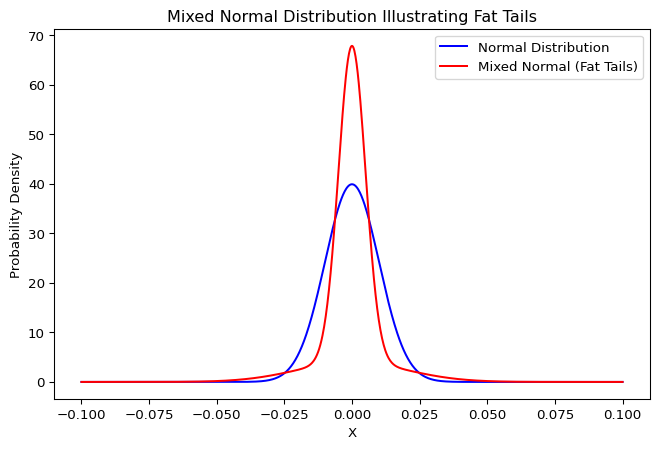

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Set range
MAX_MIN = 0.1
x_vals = np.linspace(-MAX_MIN, MAX_MIN, 1000)

# Create the plot using fig and ax
fig, ax = plt.subplots(figsize=(8, 5))

#Calculate mean and std:
rmean = 0
rstd = 0.01

# Normal distribution and mixed normal distribution:
norm_dist    =     norm.pdf(x_vals, loc=rmean, scale=rstd)
fat_tails = (0.8 * norm.pdf(x_vals, loc=rmean, scale=rstd*0.5) 
           + 0.2 * norm.pdf(x_vals, loc=rmean, scale=rstd*2))

# Plotting
ax.plot(x_vals, norm_dist, label="Normal Distribution", color='blue')
ax.plot(x_vals, fat_tails, label="Mixed Normal (Fat Tails)", color='red')

# Set title, labels, and grid and legend
ax.set_title('Mixed Normal Distribution Illustrating Fat Tails')
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')
ax.legend()

## Empirical distribution

Let us examine how empirical returns compare with the normal
distribution, and also attempt to fit a mixed normal distribution to the
data. We will use data from <https://titlon.uit.no> to create a
histogram and overlay a fitted normal density to assess whether the
empirical distribution exhibits heavy (fat) tails. We will then compare
this with a simple mixed normal (Gaussian mixture) fit.

We start by fetching data for the OSEBX index from
[titlon.uit.no](https://titlon.uit.no).

In [12]:
import pandas as pd
#Query script for MySQL client
import pymysql
con = pymysql.connect(host='titlon.uit.no', 
                user      = "user@uit.no",
                password  = "pawswordfromtitlon",
                    database='OSE')  
crsr=con.cursor()
crsr.execute("""
    SELECT 
    `Date`, `OSEBXLinked`, `OBXLinked`, `OSEFXLinked`, `ID` 
    FROM `OSE`.`equityindex_linked` 
    WHERE year(`Date`) >= 1980
    
""")
r=crsr.fetchall()
df=pd.DataFrame(list(r), 
        columns=[i[0] for i in crsr.description])
df
#YOU NEED TO BE CONNECTED TO YOUR INSTITUTION VIA VPN, 
#OR BE AT THE INSTITUTION, FOR THIS CODE TO WORK

pd.to_pickle(df,'data/index.df')
df = None #in order to avoid memory problems

We then calculate the return series and create a histogram of daily
returns. The sample mean and standard deviation for the period are also
computed to provide a simple summary of the distribution.

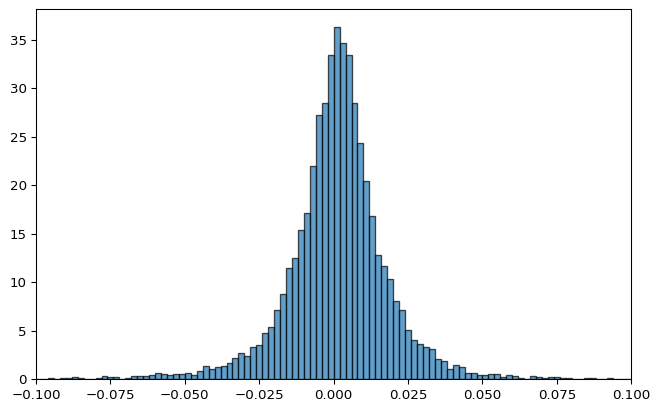

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
# loading the data
df = pd.read_pickle('data/index.df')

# Creating the plot using fig and ax
fig, ax = plt.subplots(figsize=(8, 5))

#fixing Date, setting index and calculate returns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Returns'] = df['OSEBXLinked'].pct_change()

#Calculate mean and std:
rmean = np.mean(df['Returns'])
rstd = np.std(df['Returns'])

# Define the histogram intervals (dx = 0.01)
dx = 0.002
bins = int((0.2 - (-0.2)) / dx)

# Create the plot
ax.hist(df['Returns'].dropna(), bins=bins, 
        range=(-0.2, 0.2), density=True, 
        edgecolor='k', alpha=0.7)
df = None

# Set x-axis limits
ax.set_xlim(-MAX_MIN, MAX_MIN)

Next, we compute the fitted normal and a simple mixed normal using the
estimated mean and standard deviation. For the mixture, we choose (by
trial and error) an 80% weight on a normal with 40% of the estimated
volatility and a 20% weight on a normal with 200% of the estimated
volatility.

Both fitted densities are then overlaid on the existing histogram for
comparison.

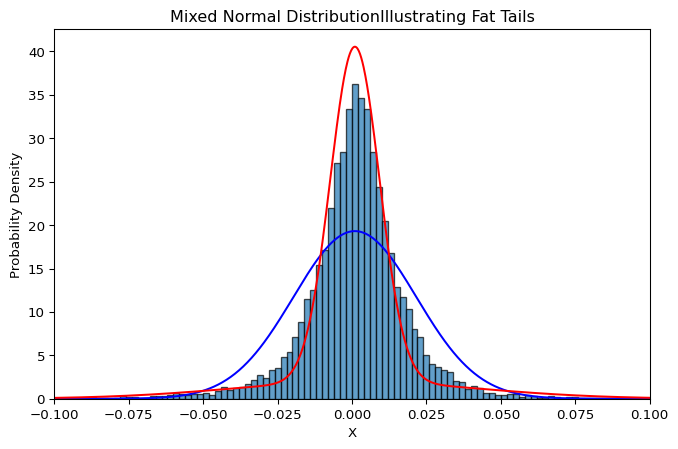

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Defining the range of x-values:
MAX_MIN = 0.1
x_vals = np.linspace(-MAX_MIN, MAX_MIN, 1000)

# Calculate normal dist and the mixed normal dist:
norm_dist    =     norm.pdf(x_vals, loc=rmean, scale=rstd)
fat_tails = (0.8 * norm.pdf(x_vals, loc=rmean, scale=rstd*0.4) + 
             0.2 * norm.pdf(x_vals, loc=rmean, scale=rstd*2))

# Plotting normal dist and mixed normal dist
ax.plot(x_vals, norm_dist, 
            label="Normal Distribution", color='blue')
ax.plot(x_vals, fat_tails, 
            label="Mixed Normal (Fat Tails)", color='red')

# Set title, labels and legend
ax.set_title('Mixed Normal Distribution' 
                'Illustrating Fat Tails')
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')

fig

# Literature

Arrow, Kenneth J. 1971. *Essays in the Theory of Risk-Bearing*. Chicago:
Markham Publishing Company.

Euler, Leonhard. 1748. *Introductio in Analysin Infinitorum*. Lausanne:
Marc Michel Bousquet.

Gauss, Carl Friedrich. 1809. *Theoria Motus Corporum Coelestium in
Sectionibus Conicis Solem Ambientium*. Hamburg: Perthes; Besser.

Leibniz, Gottfried Wilhelm. 1969. *Leibniz: The Early Mathematical
Manuscripts*. Edited by Joseph E. Hofmann. New York: Dover Publications.

Neumann, John von, and Oskar Morgenstern. 1947. *Theory of Games and
Economic Behavior*. 2nd ed. Princeton, NJ: Princeton University Press.

Pratt, John W. 1964. “Risk Aversion in the Small and in the Large.”
*Econometrica* 32 (1/2): 122–36. <https://doi.org/10.2307/1913738>.

Tobin, James. 1958. “Liquidity Preference as Behavior Towards Risk.”
*The Review of Economic Studies* 25 (2): 65–86.
<https://doi.org/10.2307/2296205>.